[-0.47819587 -0.49496844 -0.5        -0.49745119] E_ground


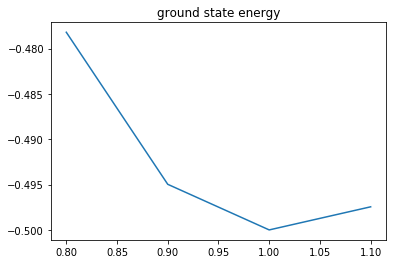

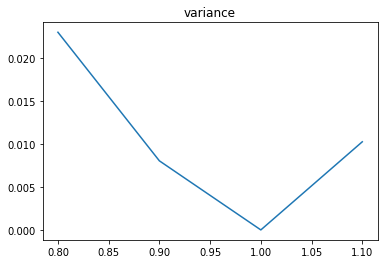

In [3]:
import numpy as np
from QMCP.functions import vmc
import matplotlib.pyplot as plt
from QMCP.harmonic_oscillator import Oscillator
from QMCP.functions import bootstrap
from QMCP.hydrogen_atom import Hydrogen_atom


def metropolis(function, N, n_walkers):
    rn = np.zeros((dim, N, n_walkers))
    r = np.random.randn(dim, n_walkers)
    
    for i in range(N):
        r_trial = r + (0.1*np.random.randn(dim, n_walkers))
        ratio = (function(r_trial) / function(r))**2
        eta = np.random.uniform(0,1,(dim,n_walkers))
        rn[:,i,:] = np.where(ratio >= 1, r_trial, (np.where(eta < ratio, r_trial, r)))
        r = np.where(ratio >= 1, r_trial, (np.where(eta < ratio, r_trial, r)))

    rn = np.reshape(rn[:,4000:,:], (dim,n_walkers*N - (n_walkers * 4000)))

    return(rn)


def vmc(alpha, quantum_system):

    E_ground = np.zeros(len(alpha))
    E_ground_error = np.zeros(len(alpha))
    var = np.zeros(len(alpha))
    for i in range(len(alpha)):

        f = lambda R: quantum_system.trial_wave_function(alpha[i],R)
        prob_dens = metropolis(f,30000,40)

        E = quantum_system.E_loc(alpha[i], prob_dens)

        E_ground_error[i] = bootstrap(E[0:1000],100)
        E_ground[i] = np.mean(E)
        var[i] = np.var(E)
    return(E_ground, E_ground_error, var)

hydrogen = Hydrogen_atom(3)
alpha = np.arange(0.8, 1.2, 0.1)
dim = hydrogen.dimension
E_ground, E_ground_error, variance = vmc(alpha, hydrogen)

print(E_ground,'E_ground')
plt.figure()
plt.plot(alpha, E_ground)
plt.title('ground state energy')

plt.figure()
plt.plot(alpha, variance)
plt.title('variance')
plt.show()



In [8]:
E = np.zeros((2,2))
len(E)

2